In [2]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("Social_Network_Ads.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [16]:
df=data.drop("User ID" , axis=1)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [20]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Gender_F' and 'Gender_M' columns
df['Gender'] = label_encoder.fit_transform(df['Gender'])


print(df)


     Gender  Age  EstimatedSalary  Purchased
0         1   19            19000          0
1         1   35            20000          0
2         0   26            43000          0
3         0   27            57000          0
4         1   19            76000          0
..      ...  ...              ...        ...
395       0   46            41000          1
396       1   51            23000          1
397       0   50            20000          1
398       1   36            33000          0
399       0   49            36000          1

[400 rows x 4 columns]


In [22]:
X=df.iloc[:,:3]
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [24]:
y=df.iloc[:,-1:]
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=0)


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.fit_transform(x_test)

In [48]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=3,penalty='elasticnet',solver='saga', l1_ratio=0.5)
classifier.fit(x_train_scaler,y_train)
y_pred=classifier.predict(x_test_scaler)


c:\Users\Suyash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse


np.float64(0.10227272727272728)

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[57,  5],
       [ 4, 22]])

In [50]:
from sklearn.metrics import accuracy_score

# Assuming y_test are the true labels and y_pred are the predicted labels
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8977272727272727

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=0)
dt.fit(x_train_scaler,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)

In [44]:
y_pred=dt.predict(x_test_scaler)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9318181818181818

[Text(0.4032258064516129, 0.9444444444444444, 'x[1] <= 0.641\nentropy = 0.954\nsamples = 312\nvalue = [195, 117]'),
 Text(0.1774193548387097, 0.8333333333333334, 'x[2] <= 0.605\nentropy = 0.706\nsamples = 224\nvalue = [181, 43]'),
 Text(0.29032258064516125, 0.8888888888888888, 'True  '),
 Text(0.06451612903225806, 0.7222222222222222, 'x[1] <= -0.151\nentropy = 0.235\nsamples = 182\nvalue = [175, 7]'),
 Text(0.03225806451612903, 0.6111111111111112, 'entropy = 0.0\nsamples = 118\nvalue = [118, 0]'),
 Text(0.0967741935483871, 0.6111111111111112, 'x[2] <= -0.063\nentropy = 0.498\nsamples = 64\nvalue = [57, 7]'),
 Text(0.06451612903225806, 0.5, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.12903225806451613, 0.5, 'x[2] <= 0.402\nentropy = 0.771\nsamples = 31\nvalue = [24, 7]'),
 Text(0.0967741935483871, 0.3888888888888889, 'x[2] <= 0.024\nentropy = 0.663\nsamples = 29\nvalue = [24, 5]'),
 Text(0.06451612903225806, 0.2777777777777778, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),

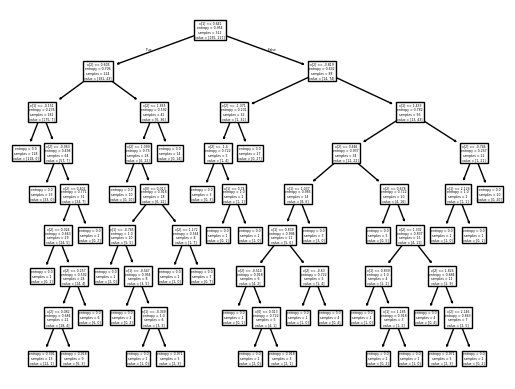

In [46]:
from sklearn import tree
tree.plot_tree(dt)